In [1]:
# Importing drive method from colab for accessing google drive
from google.colab import drive
# Mounting drive
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [ ]:
import os
import shutil

# Set the paths
source_folder = "/content/drive/MyDrive/chest-xray-masks-and-labels/data/Lung Segmentation/masks/"
destination_folder = "/content/drive/MyDrive/x_ray_data/"

# Create destination subfolders if they don't exist
normal_folder = os.path.join(destination_folder, "normal")
anormal_folder = os.path.join(destination_folder, "anormal")


os.makedirs(destination_folder, exist_ok=True)
os.makedirs(normal_folder, exist_ok=True)
os.makedirs(anormal_folder, exist_ok=True)

# Iterate through files in the source folder
for filename in os.listdir(source_folder):
    source_path = os.path.join(source_folder, filename)

    # Check if the filename contains '_0_' or '_1_'
    if "_0_" in filename:
        destination_path = os.path.join(normal_folder, filename)
    elif "_1_" in filename:
        destination_path = os.path.join(anormal_folder, filename)
    else:
        # Skip files that don't match the pattern
        continue

    # Copy the file to the appropriate folder
    shutil.copy(source_path, destination_path)

print("Files copied successfully.")


Files copied successfully.


In [ ]:
import os

# Set the paths
normal_folder = "/content/drive/MyDrive/x_ray_data/normal"
anormal_folder = "/content/drive/MyDrive/x_ray_data/anormal"

# Function to count files in a folder
def count_files(folder):
    return len([filename for filename in os.listdir(folder) if os.path.isfile(os.path.join(folder, filename))])

# Count files in the "normal" folder
normal_count = count_files(normal_folder)

# Count files in the "anormal" folder
anormal_count = count_files(anormal_folder)

# Print the counts
print(f"Number of files in 'normal' folder: {normal_count}")
print(f"Number of files in 'anormal' folder: {anormal_count}")


Number of files in 'normal' folder: 279
Number of files in 'anormal' folder: 287


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
input_folder = "/content/drive/MyDrive/x_ray_data"
splitfolders.ratio(input_folder, output ="/content/drive/MyDrive/x_ray_split", seed = 42, ratio = (.80,0.1,0.1),         group_prefix = None)

Copying files: 566 files [00:07, 74.45 files/s] 


In [ ]:
!ls "/content/drive/MyDrive/x_ray_split/train"

anormal  normal


In [2]:
!pip install -U accelerate
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [3]:
!ls '/content/drive/MyDrive/Africai2024/Images/patches/normal'

P100_R_CM_CC_15.jpg	P113_R_CM_MLO_1257.jpg	P129_R_CM_MLO_2268.jpg	P155_R_CM_CC_2818.jpg
P100_R_CM_CC_16.jpg	P113_R_CM_MLO_1258.jpg	P129_R_CM_MLO_2269.jpg	P155_R_CM_CC_2819.jpg
P100_R_CM_CC_172.jpg	P113_R_CM_MLO_1259.jpg	P129_R_CM_MLO_2270.jpg	P155_R_CM_CC_2820.jpg
P100_R_CM_CC_173.jpg	P113_R_CM_MLO_1260.jpg	P129_R_CM_MLO_2271.jpg	P155_R_CM_CC_2821.jpg
P100_R_CM_CC_174.jpg	P113_R_CM_MLO_1261.jpg	P129_R_CM_MLO_2272.jpg	P155_R_CM_CC_2822.jpg
P100_R_CM_CC_175.jpg	P113_R_CM_MLO_1262.jpg	P129_R_CM_MLO_2273.jpg	P155_R_CM_CC_2823.jpg
P100_R_CM_CC_176.jpg	P113_R_CM_MLO_1263.jpg	P129_R_CM_MLO_2274.jpg	P155_R_CM_CC_2824.jpg
P100_R_CM_CC_177.jpg	P113_R_CM_MLO_1264.jpg	P129_R_CM_MLO_2275.jpg	P155_R_CM_CC_2825.jpg
P100_R_CM_CC_178.jpg	P113_R_CM_MLO_1265.jpg	P129_R_CM_MLO_2276.jpg	P155_R_CM_CC_2826.jpg
P100_R_CM_CC_179.jpg	P113_R_CM_MLO_1266.jpg	P129_R_CM_MLO_2277.jpg	P155_R_CM_CC_2827.jpg
P100_R_CM_CC_17.jpg	P113_R_CM_MLO_1267.jpg	P129_R_CM_MLO_2278.jpg	P155_R_CM_CC_2828.jpg
P100_R_CM_CC_180.jpg	P11

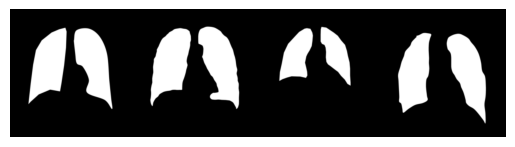

In [4]:
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

# Define the transformation
transform = transforms.Compose([ transforms.Resize((224, 224)),transforms.ToTensor(),])

# Create the ImageFolder dataset
train_ds = ImageFolder('/content/drive/MyDrive/x_ray_split/train', transform=transform)
valid_ds = ImageFolder('/content/drive/MyDrive/x_ray_split/val', transform=transform)
test_ds = ImageFolder('/content/drive/MyDrive/x_ray_split/test', transform=transform)
# Create a DataLoader for the dataset
train_loader = DataLoader(train_ds, batch_size=4, shuffle=True)

# Get a batch of images and labels
images, labels = next(iter(train_loader))

# Display the images using matplotlib
def show_images(images):
    # Make a grid of images
    img_grid = make_grid(images, nrow=4, padding=10)

    # Convert to numpy array
    img_array = img_grid.numpy()

    # Transpose to (H, W, C) format
    img_array = img_array.transpose((1, 2, 0))

    # Display the image
    plt.imshow(img_array)
    plt.axis('off')
    plt.show()

# Show the images
show_images(images)


In [5]:
import numpy as np

In [6]:
# Define the transformation
transform = transforms.Compose([ transforms.Resize((224, 224)),transforms.ToTensor(),])



## Define the Model

Here we define the model.

The model itself uses a linear layer on top of a pre-trained `ViTModel`. We place a linear layer on top of the last hidden state of the [CLS] token, which serves as a good representation of an entire image. We also add dropout for regularization.

**Note:** The Vision Transformer pretrained model can be used as a regular PyTorch layer.

In [7]:
from transformers import ViTModel
from transformers.modeling_outputs import SequenceClassifierOutput
import torch.nn as nn
import torch.nn.functional as F

class ViTForImageClassification(nn.Module):
    def __init__(self, num_labels=3):
        super(ViTForImageClassification, self).__init__()
        self.vit = ViTModel.from_pretrained('google/vit-base-patch16-224-in21k')
        self.dropout = nn.Dropout(0.1)
        self.classifier = nn.Linear(self.vit.config.hidden_size, num_labels)
        self.num_labels = num_labels

    def forward(self, pixel_values, labels):
        outputs = self.vit(pixel_values=pixel_values)
        output = self.dropout(outputs.last_hidden_state[:,0])
        logits = self.classifier(output)

        loss = None
        if labels is not None:
          loss_fct = nn.CrossEntropyLoss()
          loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
        if loss is not None:
          return logits, loss.item()
        else:
          return logits, None

## Define the Model Parameters

To train this model, we will train in 3 epochs, with a batch size of 10 and a learning rate of 2e-5:

In [10]:
EPOCHS = 10
BATCH_SIZE = 11
LEARNING_RATE = 2e-5

We will use the pretrained Vision Transformer feature extractor, an Adam Optimizer, and a Cross Entropy Loss function.

In [11]:
from transformers import ViTFeatureExtractor
import torch.nn as nn
import torch
# Define Model
model = ViTForImageClassification(len(train_ds.classes))
# Feature Extractor
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224-in21k')
# Adam Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
# Cross Entropy Loss
loss_func = nn.CrossEntropyLoss()
# Use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    model.cuda()

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


## Train the Model

In [12]:
import torch.utils.data as data
from torch.autograd import Variable
import numpy as np

print("Number of train samples: ", len(train_ds))
print("Number of test samples: ", len(valid_ds))
print("Detected Classes are: ", train_ds.class_to_idx)

train_loader = data.DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4)
test_loader  = data.DataLoader(valid_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=4)
k=0
# Train the model
for epoch in range(EPOCHS):
  for step, (x, y) in enumerate(train_loader):
    x = np.split(np.squeeze(np.array(x)), BATCH_SIZE)
    # Remove unecessary dimension
    for index, array in enumerate(x):
      x[index] = np.squeeze(array)
    # Apply feature extractor, stack back into 1 tensor and then convert to tensor
    x = torch.tensor(np.stack(feature_extractor(x)['pixel_values'], axis=0))
    # Send to GPU if available
    x, y  = x.to(device), y.to(device)
    b_x = Variable(x)   # batch x (image)
    b_y = Variable(y)   # batch y (target)
    # Feed through model
    output, loss = model(b_x, None)
    # Calculate loss
    if loss is None:
      loss = loss_func(output, b_y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    if step % 50 == 0:
      # Get the next batch for testing purposes
      test = next(iter(test_loader))
      test_x = test[0]
      # Reshape and get feature matrices as needed
      test_x = np.split(np.squeeze(np.array(test_x)), BATCH_SIZE)
      for index, array in enumerate(test_x):
        test_x[index] = np.squeeze(array)
      test_x = torch.tensor(np.stack(feature_extractor(test_x)['pixel_values'], axis=0))
      # Send to appropirate computing device
      test_x = test_x.to(device)
      test_y = test[1].to(device)
      # Get output (+ respective class) and compare to target
      test_output, loss = model(test_x, test_y)
      test_output = test_output.argmax(1)
      # Calculate Accuracy
      accuracy = (test_output == test_y).sum().item() / BATCH_SIZE
      print('Epoch: ', epoch, '| train loss: %.4f' % loss, '| val accuracy: %.2f' % accuracy)

Number of train samples:  451
Number of test samples:  55
Detected Classes are:  {'anormal': 0, 'normal': 1}


It looks like you are trying to rescale already rescaled images. If the input images have pixel values between 0 and 1, set `do_rescale=False` to avoid rescaling them again.


Epoch:  0 | train loss: 0.6903 | val accuracy: 0.45
Epoch:  1 | train loss: 0.7245 | val accuracy: 0.36
Epoch:  2 | train loss: 0.7028 | val accuracy: 0.36
Epoch:  3 | train loss: 0.7160 | val accuracy: 0.45
Epoch:  4 | train loss: 0.7653 | val accuracy: 0.09
Epoch:  5 | train loss: 0.6992 | val accuracy: 0.36
Epoch:  6 | train loss: 0.6910 | val accuracy: 0.55
Epoch:  7 | train loss: 0.6906 | val accuracy: 0.55
Epoch:  8 | train loss: 0.6861 | val accuracy: 0.64
Epoch:  9 | train loss: 0.7642 | val accuracy: 0.18


## Evaluate on a Test Image

Finally, let's evaluate the model on a test image:

In [13]:
import matplotlib.pyplot as plt
import numpy as np

EVAL_BATCH = 1
eval_loader  = data.DataLoader(test_ds, batch_size=EVAL_BATCH, shuffle=True, num_workers=4)
# Disable grad
with torch.no_grad():

  inputs, target = next(iter(eval_loader))
  # Reshape and get feature matrices as needed
  print(inputs.shape)
  inputs = inputs[0].permute(1, 2, 0)
  # Save original Input
  originalInput = inputs
  for index, array in enumerate(inputs):
    inputs[index] = np.squeeze(array)
  inputs = torch.tensor(np.stack(feature_extractor(inputs)['pixel_values'], axis=0))

  # Send to appropriate computing device
  inputs = inputs.to(device)
  target = target.to(device)

  # Generate prediction
  prediction, loss = model(inputs, target)
  # Predicted class value using argmax
  predicted_class = np.argmax(prediction.cpu())
  value_predicted = list(test_ds.class_to_idx.keys())[list(valid_ds.class_to_idx.values()).index(predicted_class)]
  value_target = list(test_ds.class_to_idx.keys())[list(valid_ds.class_to_idx.values()).index(target)]
  if value_predicted != "normal":
      # Show result
      plt.imshow(originalInput)
      plt.xlim(224,0)
      plt.ylim(224,0)
      plt.title(f'Prediction: {value_predicted} - Actual target: {value_target}')
      plt.show()

torch.Size([1, 3, 224, 224])


## Save the Entire Model

We can save the entire model as follows:

In [14]:
torch.save(model, '/content/model.pt')